pip install deepface, pip install tensorflow==2.12

CÁCH 1

In [28]:
from deepface import DeepFace
from sklearn.metrics.pairwise import cosine_similarity
from numpy.linalg import norm
import numpy as np
import matplotlib.pyplot as plt
import cv2
from scipy.spatial.distance import euclidean

In [20]:
# Hàm trích xuất embedding từ một ảnh với nhiều backbone khác nhau
def extract_embeddings(img_path, model_names):
    embeddings = {}
    for model_name in model_names:
        embedding = DeepFace.represent(img_path=img_path, model_name=model_name)[0]["embedding"]
        embeddings[model_name] = embedding
    return embeddings


In [29]:
# Hàm để tính Cosine Similarity
def compute_cosine_similarity(embedding1, embedding2):
    return cosine_similarity([embedding1], [embedding2])[0][0]

# Hàm để tính Euclidean Distance
def compute_euclidean_distance(embedding1, embedding2):
    return norm(np.array(embedding1) - np.array(embedding2))

In [30]:
# Hàm để so sánh đặc trưng của hai ảnh bằng các backbone khác nhau
def compare_backbones(embeddings_img1, embeddings_img2):
    cosine_similarities = {}
    euclidean_distances = {}

    for model_name in embeddings_img1.keys():
        cosine_sim = compute_cosine_similarity(embeddings_img1[model_name], embeddings_img2[model_name])
        euclidean_dist = compute_euclidean_distance(embeddings_img1[model_name], embeddings_img2[model_name])

        cosine_similarities[model_name] = cosine_sim
        euclidean_distances[model_name] = euclidean_dist

    return cosine_similarities, euclidean_distances


In [33]:
# Hàm hiển thị kết quả so sánh
def display_results(cosine_similarities, euclidean_distances):
    print("Cosine Similarities:")
    for model_name, value in cosine_similarities.items():
        print(f"{model_name}: {value:.4f}")

    print("\nEuclidean Distances:")
    for model_name, value in euclidean_distances.items():
        print(f"{model_name}: {value:.4f}")


In [32]:
# Đường dẫn tới ảnh (thay đổi theo ảnh của bạn)
img1_path = "neymarfr.jpg"
img2_path = "neymarfr1.jpg"

# Các backbone (mô hình) được hỗ trợ trong DeepFace
backbones = ['VGG-Face', 'Facenet', 'OpenFace', 'DeepFace', 'ArcFace', 'SFace']

# Trích xuất đặc trưng cho cả hai ảnh
print("Trích xuất đặc trưng từ các backbone...")
embeddings_img1 = extract_embeddings(img1_path, backbones)
embeddings_img2 = extract_embeddings(img2_path, backbones)

# So sánh giữa các backbone
print("So sánh các backbone...")
cosine_similarities, euclidean_distances = compare_backbones(embeddings_img1, embeddings_img2)

# Hiển thị kết quả
display_results(cosine_similarities, euclidean_distances)


Trích xuất đặc trưng từ các backbone...
So sánh các backbone...
Cosine Similarities:
VGG-Face: 0.4585
Facenet: 0.7586
OpenFace: 0.7457
DeepFace: 0.7592
ArcFace: 0.6377
SFace: 0.4896

Euclidean Distances:
VGG-Face: 1.0407
Facenet: 8.4885
OpenFace: 0.7132
DeepFace: 56.4997
ArcFace: 3.1990
SFace: 9.8788


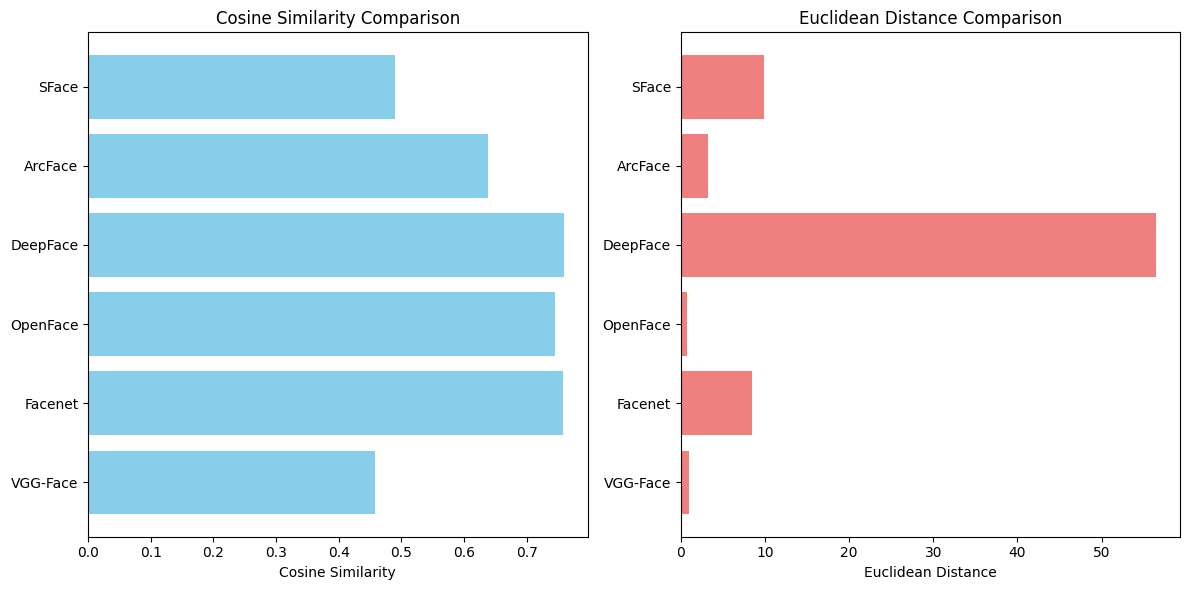

In [34]:
# Hàm vẽ biểu đồ
def plot_comparison(cosine_similarities, euclidean_distances):
    backbones = list(cosine_similarities.keys())
    cosine_vals = list(cosine_similarities.values())
    euclidean_vals = list(euclidean_distances.values())

    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.barh(backbones, cosine_vals, color='skyblue')
    plt.xlabel('Cosine Similarity')
    plt.title('Cosine Similarity Comparison')

    plt.subplot(1, 2, 2)
    plt.barh(backbones, euclidean_vals, color='lightcoral')
    plt.xlabel('Euclidean Distance')
    plt.title('Euclidean Distance Comparison')

    plt.tight_layout()
    plt.show()

# Vẽ biểu đồ so sánh
plot_comparison(cosine_similarities, euclidean_distances)


In [35]:
# Hàm tính toán khoảng cách Euclidean và Cosine
def calc_cost(embedding1, embedding2):
    cosine_dist = cosine_similarity([embedding1], [embedding2])[0][0]
    euclidean_dist = euclidean(embedding1, embedding2)
    return cosine_dist, euclidean_dist

# Lưu kết quả cho từng backbone
results = []

# Thử nghiệm với từng backbone
for backbone in backbones:
    print(f"\n--- Evaluating with {backbone} backbone ---")
    # Trích xuất đặc trưng khuôn mặt từ ảnh với từng backbone
    embedding1 = DeepFace.represent(img_path=img1_path, model_name=backbone)[0]["embedding"]
    embedding2 = DeepFace.represent(img_path=img2_path, model_name=backbone)[0]["embedding"]

    # Tính toán cosine similarity và euclidean distance
    cosine_dist, euclidean_dist = calc_cost(embedding1, embedding2)

    # In kết quả
    print(f"{backbone} - Cosine Similarity: {cosine_dist}")
    print(f"{backbone} - Euclidean Distance: {euclidean_dist}")
    
    # Lưu kết quả vào danh sách
    results.append({
        "backbone": backbone,
        "cosine_similarity": cosine_dist,
        "euclidean_distance": euclidean_dist
    })

# In tất cả kết quả so sánh
for result in results:
    print(f"\nBackbone: {result['backbone']}")
    print(f"Cosine Similarity: {result['cosine_similarity']}")
    print(f"Euclidean Distance: {result['euclidean_distance']}")



--- Evaluating with VGG-Face backbone ---
VGG-Face - Cosine Similarity: 0.4585206217450983
VGG-Face - Euclidean Distance: 1.0406530432905117

--- Evaluating with Facenet backbone ---
Facenet - Cosine Similarity: 0.7585532684926533
Facenet - Euclidean Distance: 8.488453292712002

--- Evaluating with OpenFace backbone ---
OpenFace - Cosine Similarity: 0.7456669132224123
OpenFace - Euclidean Distance: 0.7132083918422135

--- Evaluating with DeepFace backbone ---
DeepFace - Cosine Similarity: 0.7591760772513209
DeepFace - Euclidean Distance: 56.49967812400074

--- Evaluating with ArcFace backbone ---
ArcFace - Cosine Similarity: 0.6376948364717018
ArcFace - Euclidean Distance: 3.198952261129608

--- Evaluating with SFace backbone ---
SFace - Cosine Similarity: 0.4895572413428388
SFace - Euclidean Distance: 9.878757473022914

Backbone: VGG-Face
Cosine Similarity: 0.4585206217450983
Euclidean Distance: 1.0406530432905117

Backbone: Facenet
Cosine Similarity: 0.7585532684926533
Euclidean Dis